In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://raw.githubusercontent.com/BiaChacon/data-science-starting/master/datasets/microdados_enem/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(uri)

colunas_de_notas = ['NU_NOTA_CN', 
                    'NU_NOTA_CH', 
                    'NU_NOTA_LC', 
                    'NU_NOTA_MT', 
                    'NU_NOTA_REDACAO']      

dados_notas = dados[colunas_de_notas].dropna()

dados_notas.columns = ['ciencias_naturais', 
                       'ciencias_humanas', 
                       'linguagem_codigo', 
                       'matematica', 
                       'redacao']

x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
y_adivinhar = dados_notas['linguagem_codigo']

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

## Desafio 1

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [15]:
C_value = 0.7
max_iter_value = 400

modelo = LinearSVR(C=C_value, max_iter=max_iter_value)
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
print("C: %s \nmax_inter: %s\nmean_squared_error: %s\n" % (C_value, max_iter_value,erro_quadratico_medio))

C: 0.7 
max_inter: 400
mean_squared_error: 7189.574740939616



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Desafio 2

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

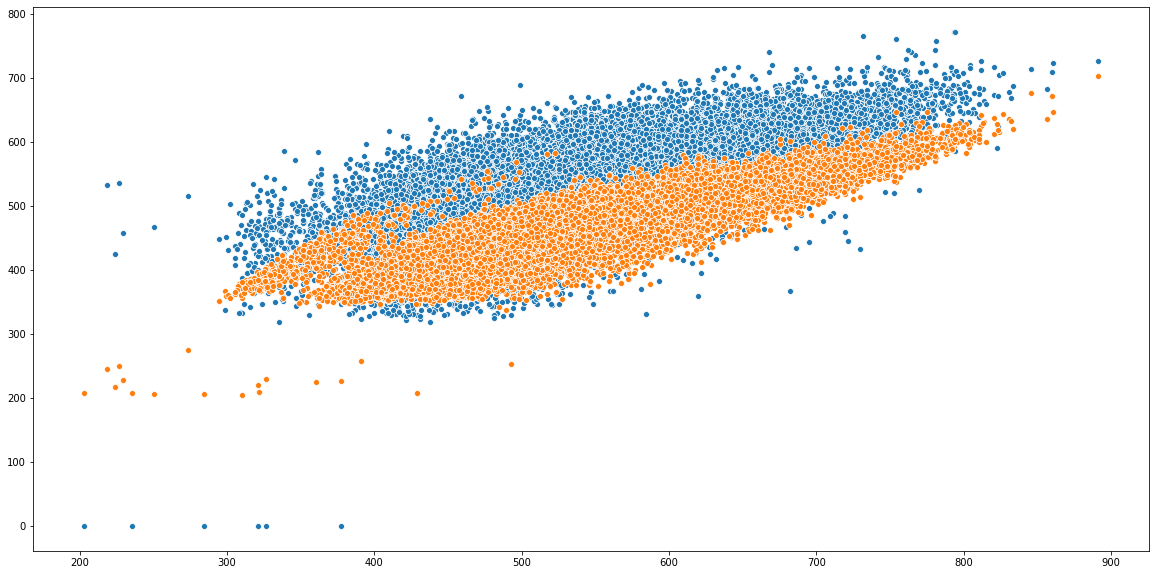

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)

## Desafio 3

Remover as notas zero e testar os mesmos modelos, comparando o resultado

Modelo LinearSVR e modelo DecisionTreeRegressor com dropna

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


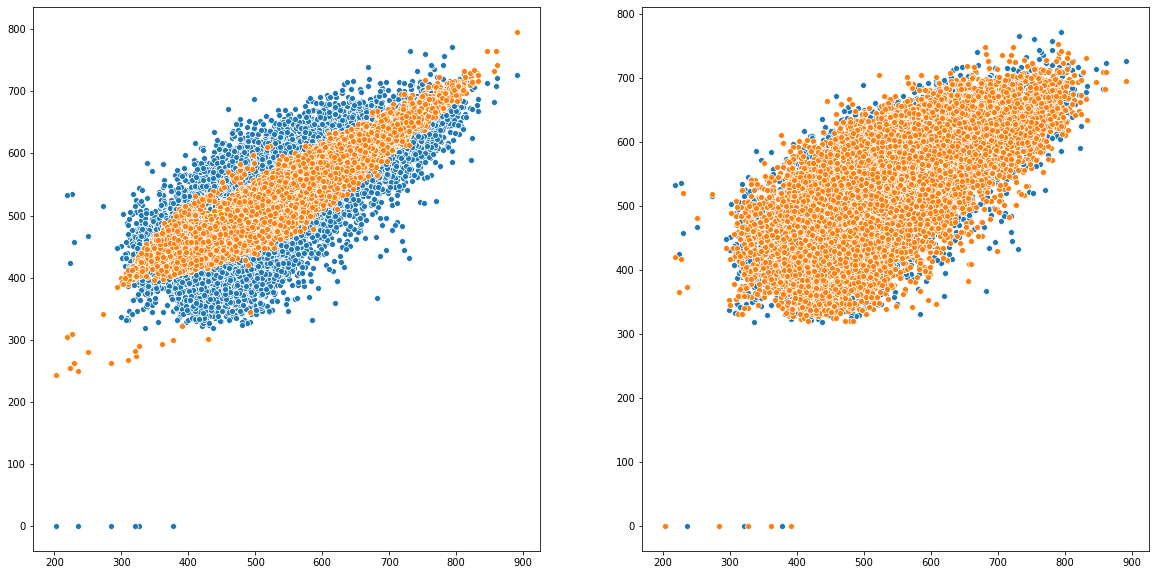

In [46]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
erro_linear = ("mean_squared_error do modelo LinearSVR: %s\n" % (erro_quadratico_medio))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
erro_DTR = ("mean_squared_error do modelo DecisionTreeRegressor: %s\n" % (erro_quadratico_medio))

plt.subplot(1,2,2)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)

In [47]:
print(erro_linear)
print(erro_DTR)

mean_squared_error do modelo LinearSVR: 2147.8349282373147

mean_squared_error do modelo DecisionTreeRegressor: 4134.87676412534



Modelo LinearSVR e modelo DecisionTreeRegressor com zero

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


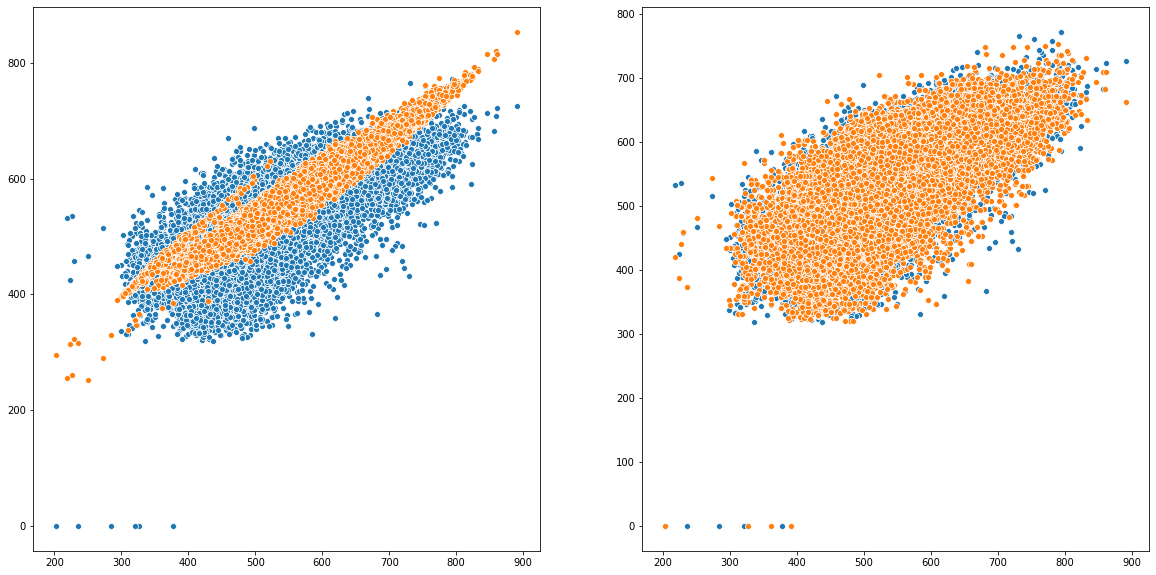

In [48]:
dados_notas = dados[colunas_de_notas].fillna(0)
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
erro_linear = ("mean_squared_error do modelo LinearSVR: %s\n" % (erro_quadratico_medio))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
erro_DTR = ("mean_squared_error do modelo DecisionTreeRegressor: %s\n" % (erro_quadratico_medio))

plt.subplot(1,2,2)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)

In [49]:
print(erro_linear)
print(erro_DTR)

mean_squared_error do modelo LinearSVR: 2768.556444844916

mean_squared_error do modelo DecisionTreeRegressor: 4149.245780491816



## Desafio 4

Interpretar tudo que foi feito e compartilhar suas conclusões

Modelos de previsões não devem ser uteis para definir as médias das máterias pois cada aluno tem afinades distinstas. Podemos ver que o erro quadratico é o mesmo.

In [0]:
x_4_notas_1 = dados_notas[['ciencias_naturais', 'matematica', 'ciencias_humanas', 'linguagem_codigo']]
y_adivinhar_1 = dados_notas['redacao']
np.random.seed(43267)
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
text = ("mean_squared_error redacao: %s\n" % (erro_quadratico_medio))

x_4_notas_1 = dados_notas[['ciencias_naturais', 'matematica', 'linguagem_codigo', 'redacao']]
y_adivinhar_1 = dados_notas['ciencias_humanas']
np.random.seed(43267)
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
text = (text + ("mean_squared_error ciencias_humanas: %s\n" % (erro_quadratico_medio)))

x_4_notas_1 = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'redacao']]
y_adivinhar_1 = dados_notas['matematica']
np.random.seed(43267)
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
text = (text + ("mean_squared_error matematica: %s\n" % (erro_quadratico_medio)))

x_4_notas_1 = dados_notas[['matematica', 'ciencias_humanas', 'linguagem_codigo']]
y_adivinhar_1 = dados_notas['ciencias_naturais']
np.random.seed(43267)
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
text = (text + ("mean_squared_error ciencias_naturais: %s\n" % (erro_quadratico_medio)))

In [60]:
print(text)

mean_squared_error redacao: 2147.8349282373147
mean_squared_error ciencias_humanas: 2147.8349282373147
mean_squared_error matematica: 2147.8349282373147
mean_squared_error ciencias_naturais: 2147.8349282373147



## Desafio 5
Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [59]:
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

predicoes_notas_linguagem = modelo.predict(x_teste)
erro_quadratico_medio = mean_squared_error(y_teste, predicoes_notas_linguagem)
print("mean_squared_error no conjunto de teste: %s\n" % (erro_quadratico_medio))

predicoes_notas_linguagem = modelo.predict(x_treino)
erro_quadratico_medio = mean_squared_error(y_treino, predicoes_notas_linguagem)
print("mean_squared_error no conjunto de treino: %s\n" % (erro_quadratico_medio))

mean_squared_error no conjunto de teste: 4134.87676412534

mean_squared_error no conjunto de treino: 0.0

